# Maternal Diabetes Analysis

#### Ignore warnings

In [29]:
import warnings
warnings.filterwarnings('ignore')

#### Handle table like data and matrices

In [30]:
import pandas as pd
import numpy as np

#### Modelling Algorithms 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

#### Modelling Helpers

In [32]:
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

#### Visualisation

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

### Loading dataset and wrangling

In [34]:
df = pd.read_csv('/home/shubham/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.shape

(768, 9)

In [36]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
class_counts = df.groupby('Outcome').size()
print(class_counts)

Outcome
0    500
1    268
dtype: int64


In [41]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3) 
correlations = df.corr(method='pearson') 
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
Pedigree,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


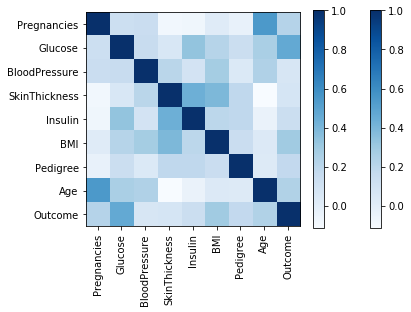

In [43]:
plt.imshow(df.corr(method='pearson'), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

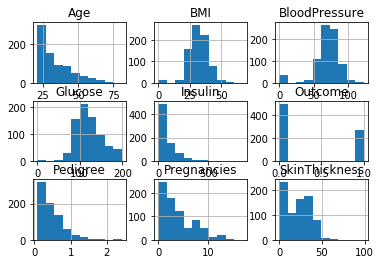

In [44]:
df.hist()
plt.show()

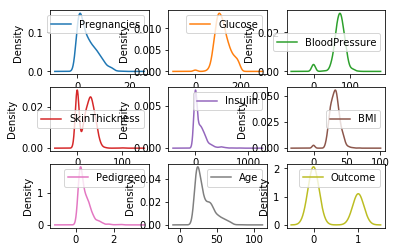

In [48]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

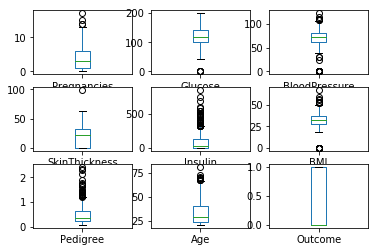

In [50]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) 
plt.show()

In [52]:
x,y = np.hsplit(df,[8])

In [53]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [54]:
y.head()

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [55]:
train_valid_X = x[ 0:537 ]
train_valid_y = y
test_X = x[ 537: ]
train_X , valid_X , train_y , valid_y = train_test_split( x , y , train_size = .7 )

In [56]:
x.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape

((768, 8), (537, 8), (231, 8), (537, 1), (231, 1), (231, 8))

In [57]:
model = RandomForestClassifier(n_estimators=100)
# Score the model
score = model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(1.0, 0.77056277056277056)


In [58]:
model = SVC()
# Score the model
score = model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(1.0, 0.67965367965367962)


In [59]:
model = GradientBoostingClassifier()
# Score the model
score = model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(0.93668528864059586, 0.72727272727272729)


In [60]:
model = KNeighborsClassifier(n_neighbors = 3)
# Score the model
score = model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(0.84729981378026076, 0.67965367965367962)


In [61]:
model = GaussianNB()
# Score the model
score = model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(0.76908752327746743, 0.76190476190476186)


In [62]:
model = LogisticRegression()
# Score the model
score = model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(0.77653631284916202, 0.75757575757575757)


In [63]:
model = DecisionTreeClassifier()
# Score the model
score = model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(1.0, 0.69264069264069261)
